Manejo de objetos que tienen estructuras jerárquicas de forma que una subestructura (incluso un nodo) se maneje igual que la estructura completa

Primero creamos la clase madre

In [1]:
class Task
  attr_reader :name
  def initialize(name)
    @name = name
  end 
  def get_time_required
    0.0
  end 
end 

:get_time_required

Estas son clases que heredan de Task, si tuvieramos que ordenarlas en un arbol jerárquico, estarían lo más abajo posible, son las llamadas "leaf" y no tienen más relaciones que la herencia con la madre

In [2]:
class AddDryIngredients < Task
  def initialize
    super('Add dry ingredients')
  end 
  def get_time_required
    1.0             # 1 minute to add flour and sugar
  end 
end 

class AddLiquids < Task
  def initialize
    super('Add liquids')
  end 
  def get_time_required
    2.0             # 2 minutes to add milk
  end 
end 

class Mix < Task
  def initialize
    super('Mix that batter up!')
  end 
  def get_time_required
    3.0             # Mix for 3 minutes
  end 
end 

:get_time_required

La clase MakeBatter utiliza las clases descritas recientemente y es una agregación/composición de la clase madre.
Esta clase es la que finalmente realiza todas las acciones.

In [3]:
class MakeBatter < Task
  def initialize
    super('Make batter')
    @sub_tasks = []
    add_sub_task( AddDryIngredients.new )
    add_sub_task( AddLiquids.new )
    add_sub_task( Mix.new )
    end 
    def add_sub_task(task)
      @sub_tasks << task
    end 
    def remove_sub_task(task)
      @sub_tasks.delete(task)
    end 
    def get_time_required
      time=0.0
      @sub_tasks.each {|task| time += task.get_time_required}
      time
    end 
  end 

:get_time_required

Se instancia a la clase que relaciona a todas, dado que ella es la que realiza todas las acciones.

In [7]:
make = MakeBatter.new

puts "It will take a total time of #{make.get_time_required} secs"

It will take a total time of 6.0 secs


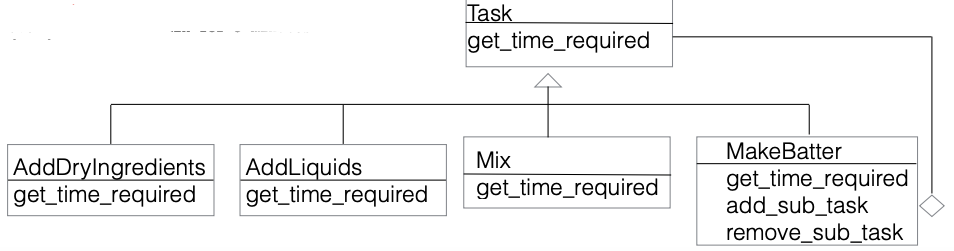

Entonces si tenemos una composición de clases, esta se deberá escribir de esa forma, más simplificada, de manera de poder acceder fácilmente a cada entidad. Siempre existirá la clase madre, la clase que acompaña a esta y utiliza a las "leaf" (puede estar relacionada con la madre por composición o agregación). Y finalmente las "leaf", que serían las entidades que heredan de la madre.

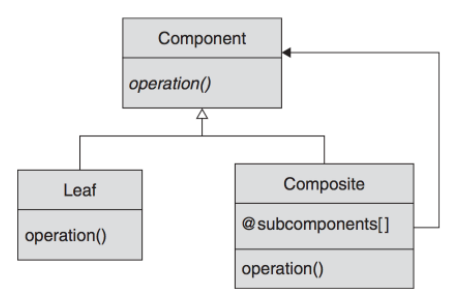

**OTRO EJEMPLO**

Definimos la clase `Component`, como una clase abstracta, donde se detallan los métodos que tendrán como base los herederos

In [10]:
# The base Component class declares common operations for both simple and
# complex objects of a composition.
class Component
    # @return [Component]
    def parent
      @parent
    end
  
    # Optionally, the base Component can declare an interface for setting and
    # accessing a parent of the component in a tree structure. It can also provide
    # some default implementation for these methods.
    def parent=(parent)
      @parent = parent
    end
  
    # In some cases, it would be beneficial to define the child-management
    # operations right in the base Component class. This way, you won't need to
    # expose any concrete component classes to the client code, even during the
    # object tree assembly. The downside is that these methods will be empty for
    # the leaf-level components.
    def add(component)
      raise NotImplementedError, "#{self.class} has not implemented method '#{__method__}'"
    end
  
    # @abstract
    #
    # @param [Component] component
    def remove(component)
      raise NotImplementedError, "#{self.class} has not implemented method '#{__method__}'"
    end
  
    # You can provide a method that lets the client code figure out whether a
    # component can bear children.
    def composite?
      false
    end
  
    # The base Component may implement some default behavior or leave it to
    # concrete classes (by declaring the method containing the behavior as
    # "abstract").
    def operation
      raise NotImplementedError, "#{self.class} has not implemented method '#{__method__}'"
    end
  end


:operation

Luego definimos las clases que heredarán de la clase `Component`, las cuales serán:

`Composite`: Será la clase encargada de poseer todos los elementos que tengan sub-elementos, es decir, se utilizará para todos los componentes que **no** sean hojas

`Leaf`: Será la clase hoja que no posee subcomponetes, es decir, representa la parte inferior del árbol de composiciones.

In [11]:
  # The Composite class represents the complex components that may have children.
  # Usually, the Composite objects delegate the actual work to their children and
  # then "sum-up" the result.
  class Composite < Component
    def initialize
      @children = []
    end
  
    # A composite object can add or remove other components (both simple or
    # complex) to or from its child list.
  
    # @param [Component] component
    def add(component)
      @children.append(component)
      component.parent = self
    end
  
    # @param [Component] component
    def remove(component)
      @children.remove(component)
      component.parent = nil
    end
  
    # @return [Boolean]
    def composite?
      true
    end
  
    # The Composite executes its primary logic in a particular way. It traverses
    # recursively through all its children, collecting and summing their results.
    # Since the composite's children pass these calls to their children and so
    # forth, the whole object tree is traversed as a result.
    def operation
      results = []
      @children.each { |child| results.append(child.operation) }
      "Branch(#{results.join('+')})"
    end
  end



  # The Leaf class represents the end objects of a composition. A leaf can't have
  # any children.
  #
  # Usually, it's the Leaf objects that do the actual work, whereas Composite
  # objects only delegate to their sub-components.
  class Leaf < Component
    # return [String]
    def operation
      'Leaf'
    end
  end

:operation

Finalmente, definiremos las funciones `client_code`, las cuales interactuarán con la estructura que definimos

In [13]:
 # The client code works with all of the components via the base interface.
  def client_code(component)
    puts "RESULT: #{component.operation}"
  end
  
  # Thanks to the fact that the child-management operations are declared in the
  # base Component class, the client code can work with any component, simple or
  # complex, without depending on their concrete classes.
  def client_code2(component1, component2)
    component1.add(component2) if component1.composite?
  
    print "RESULT: #{component1.operation}"
  end
  

:client_code2

Poblamos las funciones he interactuamos con los componentes

In [14]:
  # This way the client code can support the simple leaf components...
  simple = Leaf.new
  puts 'Client: I\'ve got a simple component:'
  client_code(simple)
  puts "\n"
  
  # ...as well as the complex composites.
  tree = Composite.new
  
  branch1 = Composite.new
  branch1.add(Leaf.new)
  branch1.add(Leaf.new)
  
  branch2 = Composite.new
  branch2.add(Leaf.new)
  
  tree.add(branch1)
  tree.add(branch2)
  
  puts 'Client: Now I\'ve got a composite tree:'
  client_code(tree)
  puts "\n"
  
  puts 'Client: I don\'t need to check the components classes even when managing the tree:'
  client_code2(tree, simple)

Client: I've got a simple component:
RESULT: Leaf


Client: Now I've got a composite tree:
RESULT: Branch(Branch(Leaf+Leaf)+Branch(Leaf))


Client: I don't need to check the components classes even when managing the tree:
RESULT: Branch(Branch(Leaf+Leaf)+Branch(Leaf)+Leaf)